# Calcul des MSI et MACD

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle('data/yfinance-S&P500-1h.pkl')
data.head(10)

,open,high,low,close,volume,date_close
date_open,,,,,,
2023-11-21 14:30:00,4538.770020,4538.770020,4526.350098,4526.959961,0,2023-11-21 15:30:00
2023-11-21 15:30:00,4527.009766,4533.509766,4525.509766,4531.029785,257387382,2023-11-21 16:30:00
2023-11-21 16:30:00,4531.100098,4537.859863,4528.629883,4537.669922,192374214,2023-11-21 17:30:00
2023-11-21 17:30:00,4537.660156,4541.899902,4532.899902,4534.600098,162898033,2023-11-21 18:30:00
2023-11-21 18:30:00,4534.580078,4541.750000,4534.200195,4538.600098,174924000,2023-11-21 19:30:00
2023-11-21 19:30:00,4538.609863,4542.140137,4534.620117,4539.120117,201217000,2023-11-21 20:30:00
2023-11-21 20:30:00,4539.000000,4540.540039,4535.229980,4538.700195,318141000,2023-11-21 21:30:00
2023-11-22 14:30:00,4553.040039,4568.430176,4545.049805,4555.259766,0,2023-11-22 15:30:00
2023-11-22 15:30:00,4555.270020,4561.049805,4549.060059,4555.529785,234044098,2023-11-22 16:30:00


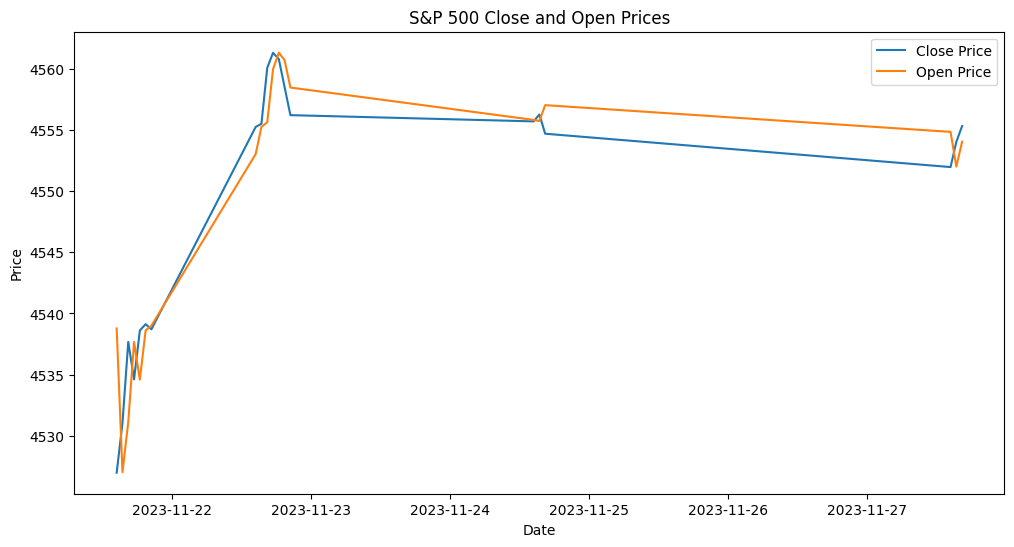

In [9]:
# plot the first 20 close and open price in the same figure
plt.figure(figsize=(12,6))
plt.plot(data['close'][:20], label='Close Price')
plt.plot(data['open'][:20], label='Open Price')
plt.title('S&P 500 Close and Open Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Calcul RSI

In [27]:
RSI_data = data.copy()
number_of_periods = 24
gain_mean = []
loss_mean = []

In [28]:
gain_loss_df = pd.DataFrame()
gain_loss_df['change'] = RSI_data['open'] - RSI_data['close']
gain_loss_df['gain'] = np.where(gain_loss_df['change'] > 0, gain_loss_df['change'], 0)
gain_loss_df['loss'] = np.where(gain_loss_df['change'] < 0, -gain_loss_df['change'], 0)

In [29]:
# Calcul des moyennes mobiles des changements
for i in range(len(gain_loss_df['change'])):
    if i < number_of_periods:
        gain_mean.append(np.nan)
        loss_mean.append(np.nan)
        continue
    elif i == number_of_periods:
        gain_mean.append(gain_loss_df['gain'][:number_of_periods].mean())
        loss_mean.append(gain_loss_df['loss'][:number_of_periods].mean())
        continue
    else:
        gain_mean.append(gain_loss_df['gain'][i-number_of_periods:i].mean())
        loss_mean.append(gain_loss_df['loss'][i-number_of_periods:i].mean())

In [30]:
# Calcul du RSI
RSI_data['RSI'] = 100 - (100 / (1 + (np.array(gain_mean) / np.array(loss_mean))))

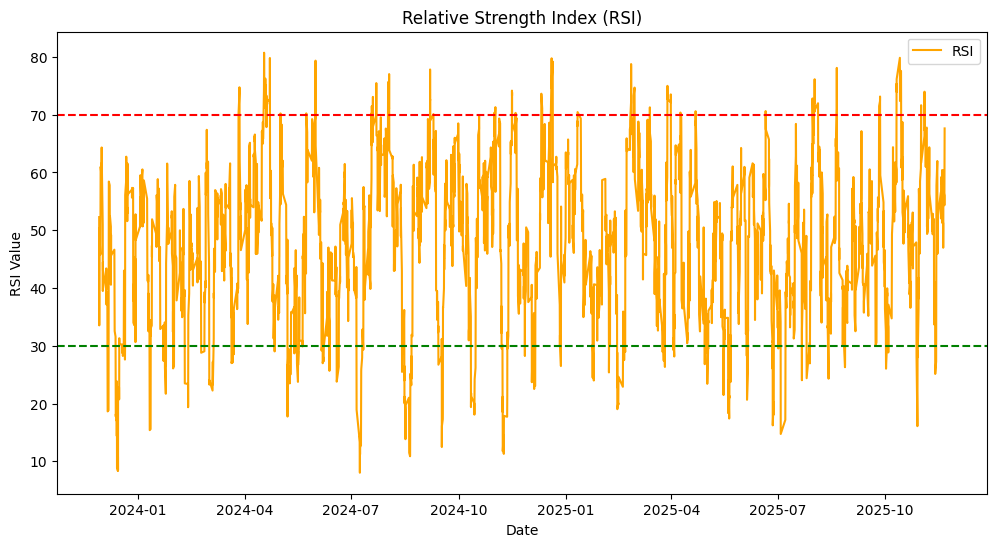

In [31]:
#plot RSI
plt.figure(figsize=(12,6))
plt.plot(RSI_data['RSI'], label='RSI', color='orange')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.legend()
plt.show()

## Calcul MACD

In [44]:
data_MACD = data.copy()
signal_period = 9

In [45]:
# Calcul des MME
MME_12 = data_MACD['close'].ewm(span=12, adjust=False).mean()
MME_26 = data_MACD['close'].ewm(span=26, adjust=False).mean()

In [46]:
# Calcul de la ligne de signal (slow line)
slow_MACD = MME_12 - MME_26
fast_MACD = slow_MACD.ewm(span=signal_period, adjust=False).mean()

In [47]:
histogram = slow_MACD - fast_MACD

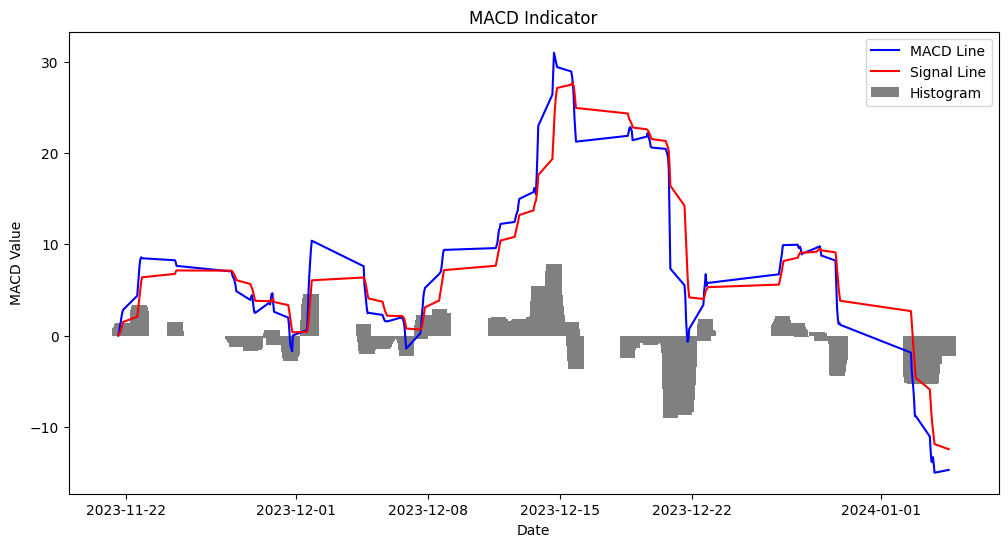

In [48]:
# plot MACD sur les 200 premières périodes
n = 200
plt.figure(figsize=(12,6))
plt.plot(slow_MACD[:n], label='MACD Line', color='blue')
plt.plot(fast_MACD[:n], label='Signal Line', color='red')
plt.bar(data_MACD.index[:n], histogram[:n], label='Histogram', color='gray')
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()

## MACD et RSI ensemble

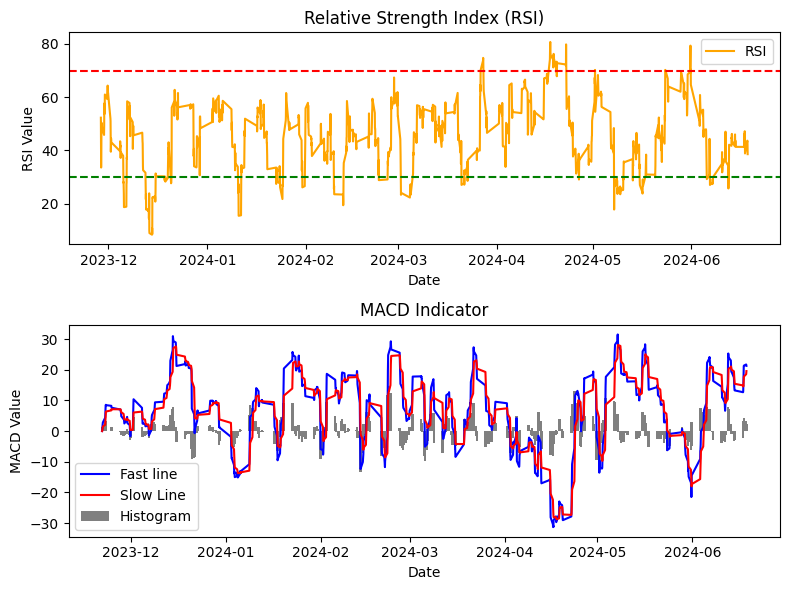

In [51]:
# plot RSI and MACD together for the first n periods on the same figure
n = 1000
plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
plt.plot(RSI_data['RSI'][:n], label='RSI', color='orange')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(slow_MACD[:n], label='Fast line', color='blue')
plt.plot(fast_MACD[:n], label='Slow Line', color='red')
plt.bar(data_MACD.index[:n], histogram[:n], label='Histogram', color='gray')
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.tight_layout()
plt.show()